In [1]:
# import the necessary python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the csv file
def get_data(csv):
    """this function reads the csv file"""
    data = pd.read_csv(csv)
    return data
csv = 'TapToBuy.csv'
df = get_data(csv)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [3]:
def summarize_data(data):
    """this function print the summary of the data"""
    print('Data Dimention')
    print(data.shape, '\n')
    
    print('Data Imfomation')
    data.info()
    
    print('Data Summary Stastistics')
    print(data.describe())
    
summarize_data(df)    

Data Dimention
(4832, 9) 

Data Imfomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4832 non-null   int64  
 1   Gender           4832 non-null   object 
 2   Ever_Married     4747 non-null   object 
 3   Age              4832 non-null   int64  
 4   Graduated        4786 non-null   object 
 5   Profession       4758 non-null   object 
 6   Work_Experience  4349 non-null   float64
 7   Spending_Score   4832 non-null   object 
 8   Family_Size      4629 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 339.9+ KB
Data Summary Stastistics
                  ID          Age  Work_Experience  Family_Size
count    4832.000000  4832.000000      4349.000000  4629.000000
mean   463471.162045    43.396523         2.676937     2.851372
std      2602.943120    16.858687         3.428501     1.512676


In [4]:
# check for any duplicate
df.duplicated().sum()

0

In [5]:
#fix the missing values in the numeric column by replacing it with the median value
numeric_cols = ['Work_Experience', 'Family_Size']  
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)  

In [6]:
#fix the nan values in categorical coulumn by replacing it with the mode
cat_cols = ['Ever_Married', 'Graduated', 'Profession']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
# check for missing values
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

#### Exploratory Data Analysis

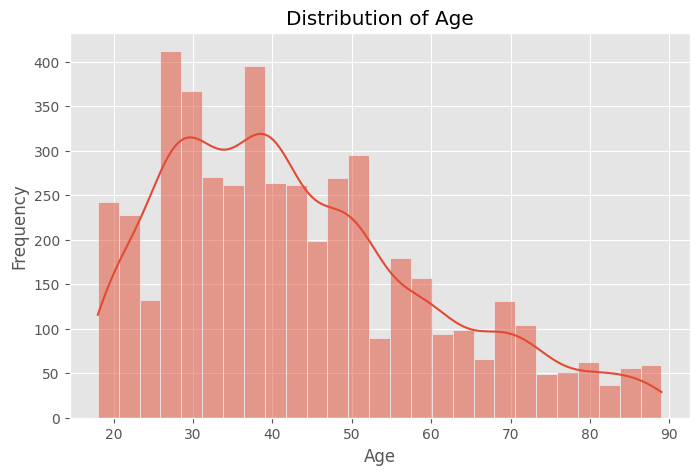

In [8]:
def plot_histogram(data, col, title):
    """Plots a histogram for a numerical column."""
    plt.figure(figsize=(8, 5))
    sb.histplot(data[col], kde=True)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
plot_histogram(df, 'Age', 'Distribution of Age')


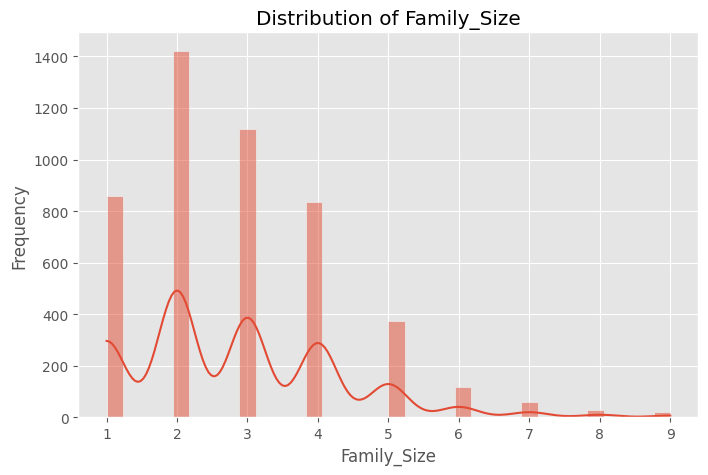

In [9]:

plot_histogram(df, 'Family_Size', 'Distribution of Family_Size')


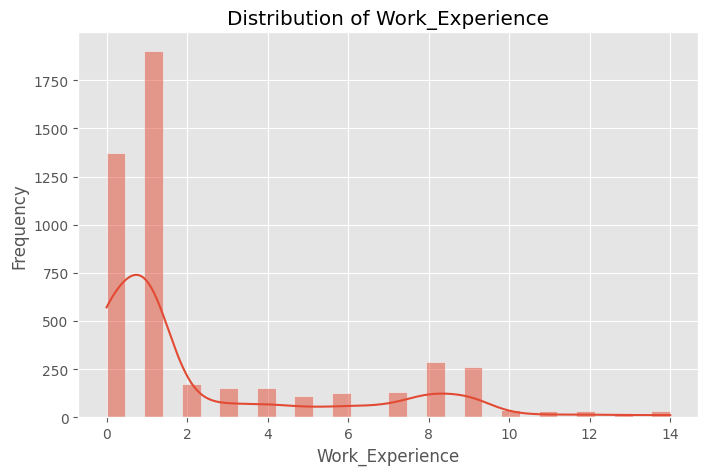

In [10]:
# Example for Age distribution
plot_histogram(df, 'Work_Experience', 'Distribution of Work_Experience')


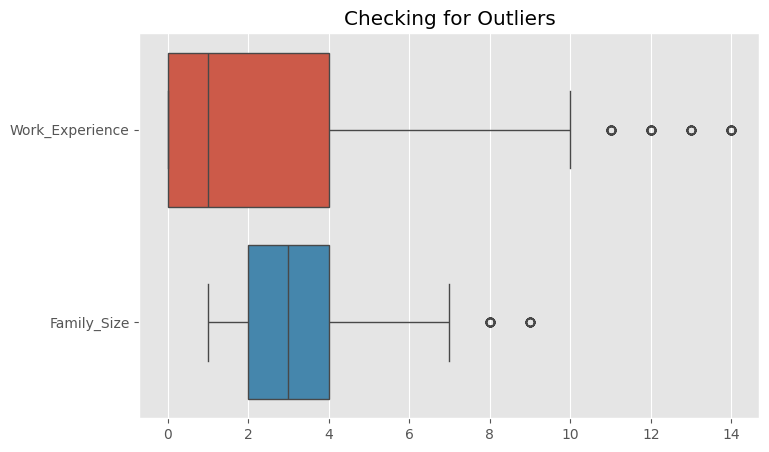

In [11]:
# plot boxplots for outliers
plt.figure(figsize=(8, 5))
sb.boxplot(data=df[numeric_cols], orient='h')  # Use numeric_cols without quotes
plt.title("Checking for Outliers")
plt.show()

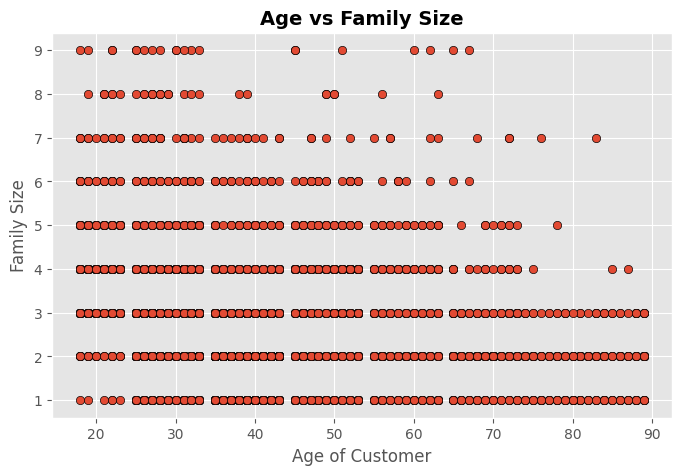

In [12]:
def plot_scatter(data, col1, col2, xlabel, ylabel, title):
    """Plots a scatter plot for two numerical columns with custom labels and title.
    """
    plt.figure(figsize=(8, 5))
    
    # Create the scatter plot
    sb.scatterplot(x=data[col1], y=data[col2], edgecolor="black")
    
    # Set the x and y axis labels
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    # Set the plot title
    plt.title(title, fontsize=14, fontweight="bold")
    
    # Display the plot
    plt.show()

# Example usage:
plot_scatter(df, 'Age', 'Family_Size', 'Age of Customer', 'Family Size', 'Age vs Family Size')


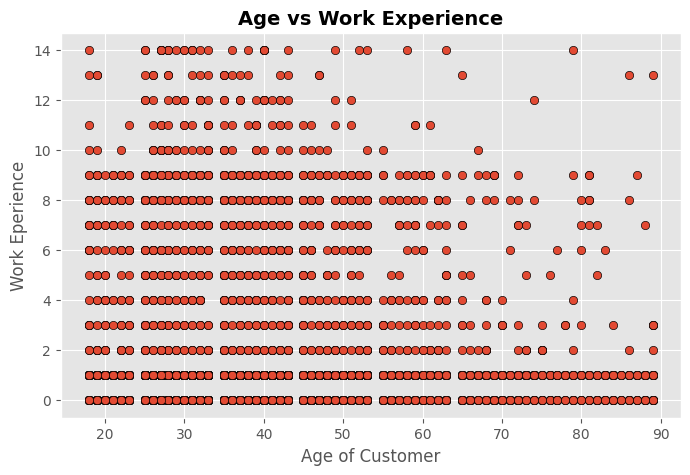

In [13]:
plot_scatter(df, 'Age', 'Work_Experience', 'Age of Customer', 'Work Eperience', 'Age vs Work Experience' )

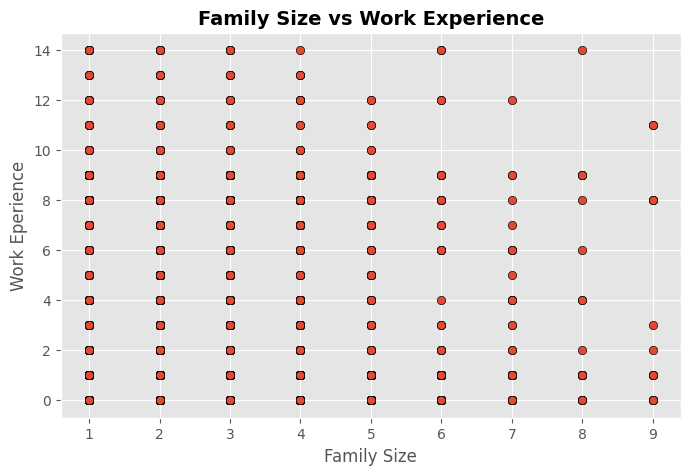

In [14]:
plot_scatter(df, 'Family_Size', 'Work_Experience', 'Family Size', 'Work Eperience', 'Family Size vs Work Experience' )

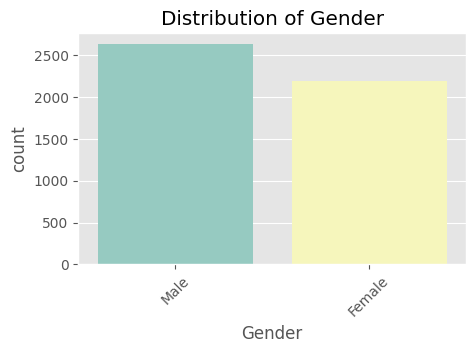

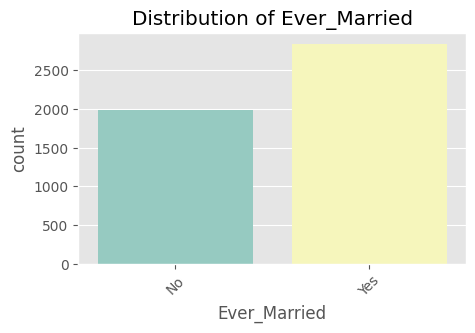

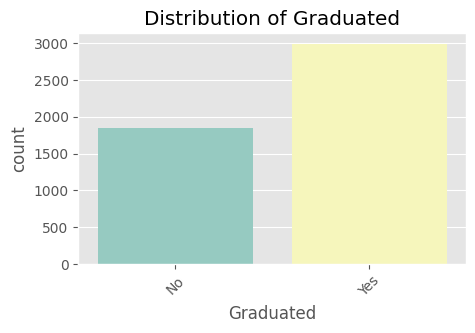

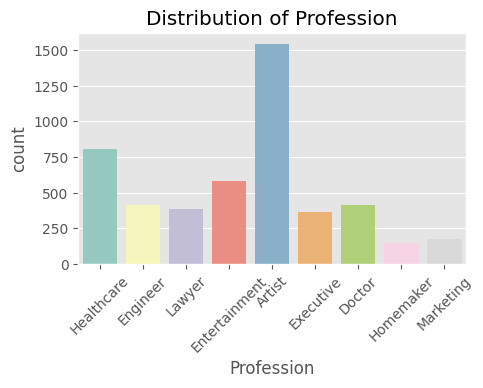

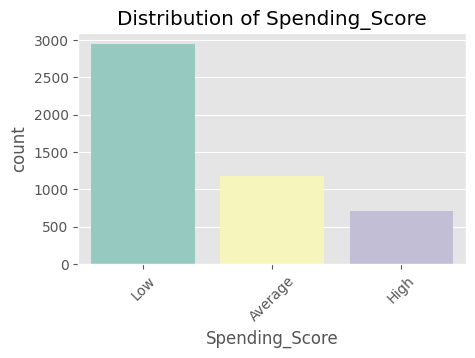

In [15]:
# plot distribution for cartegorical variables using countplot
for col in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']:
    plt.figure(figsize=(5,3))
    sb.countplot(x=df[col], palette='Set3',)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

#### Data Preprocessing

In [16]:
# scale numeric features
from sklearn.preprocessing import RobustScaler

# Select numerical columns for scaling
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']  

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check the scaled data
print(df.head())


       ID  Gender Ever_Married       Age Graduated     Profession  \
0  462809    Male           No -0.782609        No     Healthcare   
1  462643  Female          Yes -0.086957       Yes       Engineer   
2  466315  Female          Yes  1.173913       Yes       Engineer   
3  461735    Male          Yes  1.173913       Yes         Lawyer   
4  462669  Female          Yes  0.000000       Yes  Entertainment   

   Work_Experience Spending_Score  Family_Size  
0             0.00            Low          0.5  
1             0.00        Average          0.0  
2             0.00            Low         -1.0  
3            -0.25           High         -0.5  
4             0.00           High          1.5  


In [17]:
#encode categorical features
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cartegorical_features = ['Gender','Ever_Married','Graduated', 'Profession', 'Spending_Score']
for col in cartegorical_features:
    df[col] = encoder.fit_transform(df[col])
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,1,0,-0.782609,0,5,0.00,2,0.5
1,462643,0,1,-0.086957,1,2,0.00,0,0.0
2,466315,0,1,1.173913,1,2,0.00,2,-1.0
3,461735,1,1,1.173913,1,7,-0.25,1,-0.5
4,462669,0,1,0.000000,1,3,0.00,1,1.5


### Clustering with the full data frame

#### Finding Optimal Value Of Kmeans

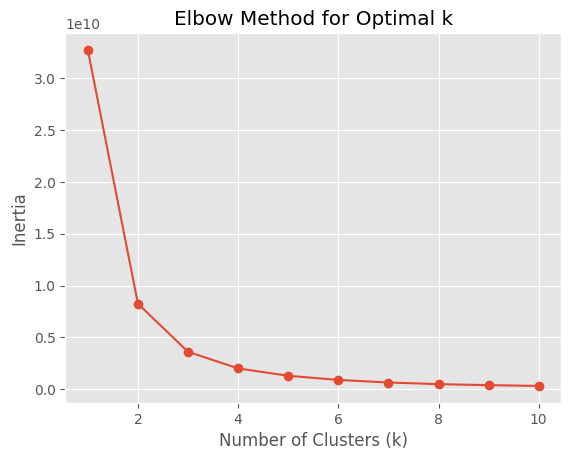

In [18]:
# import the kmaeans algorithm
from sklearn.cluster import KMeans

# Range of k values to test
k_values = range(1, 11)

# To store the inertia for each k
inertia = []

# Fit KMeans for each k and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)  
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Using Silhouuette score

Silhouette Score for k=2: 0.6240
Silhouette Score for k=3: 0.5918
Silhouette Score for k=4: 0.5764
Silhouette Score for k=5: 0.5609
Silhouette Score for k=6: 0.5532
Silhouette Score for k=7: 0.5522
Silhouette Score for k=8: 0.5498
Silhouette Score for k=9: 0.5441
Silhouette Score for k=10: 0.5440
Best k based on Silhouette Score: 2


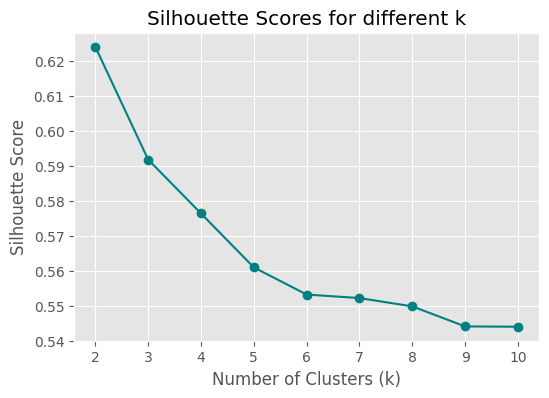

In [19]:
# import silhouette score
from sklearn.metrics import silhouette_score

sil_scores = []
k_values = range(2, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")
    
# Select k with the highest silhouette score
best_k = k_values[np.argmax(sil_scores)]  
print(f"Best k based on Silhouette Score: {best_k}")

    
# Plot Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(k_values, sil_scores, marker='o', color='teal')
plt.title('Silhouette Scores for different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()



In [20]:
# Fit the final model with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
#train the model and Assign clusters
df['Cluster'] = kmeans.fit_predict(df.drop(columns=['Cluster'], errors='ignore'))   

# View cluster counts
print(df['Cluster'].value_counts())

# View cluster characteristics
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)


1    2443
0    2389
Name: Cluster, dtype: int64
                    ID    Gender  Ever_Married       Age  Graduated  \
Cluster                                                               
0        465747.267476  0.535789      0.590624  0.144721   0.622436   
1        461245.367581  0.553827      0.584937  0.150563   0.613181   

         Profession  Work_Experience  Spending_Score  Family_Size  
Cluster                                                            
0          2.765174         0.364378        1.362495    -0.050649  
1          2.799427         0.389992        1.369218    -0.091281  


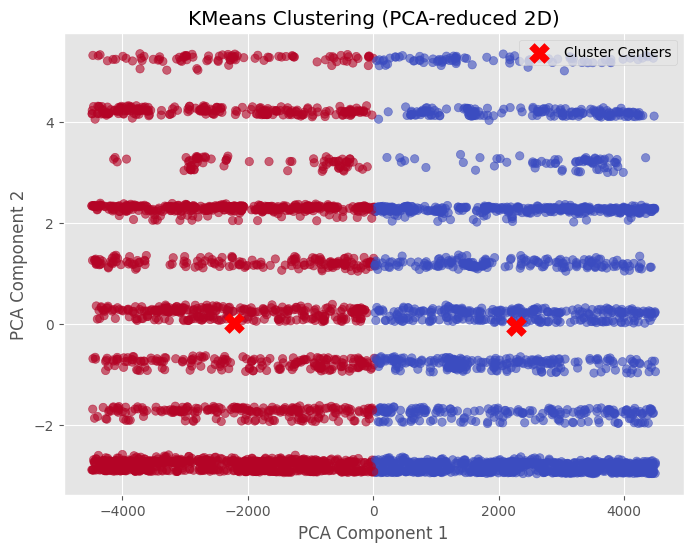

In [21]:
from sklearn.decomposition import PCA

# Reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['Cluster']))

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='coolwarm', alpha=0.6)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1], 
            s=200, c='red', marker='X', label='Cluster Centers')
plt.title('KMeans Clustering (PCA-reduced 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


### Clustering With Only Numeric Features

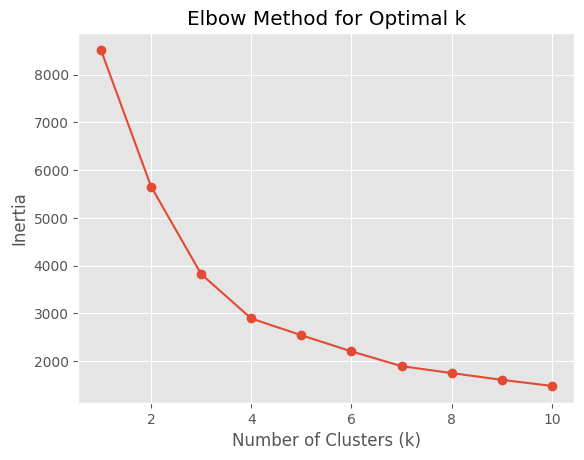

In [22]:
# Range of k values to test
k_values_num = range(1, 11)

# To store the inertia for each k
inertia_ = []

# Fit KMeans for each k and calculate inertia
for k in k_values_num:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numeric_cols])  # Assuming X_scaled contains your numerical data
    inertia_.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values_num, inertia_, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Silhouette Score for k=2: 0.4010
Silhouette Score for k=3: 0.3552
Silhouette Score for k=4: 0.3587
Silhouette Score for k=5: 0.3467
Silhouette Score for k=6: 0.3664
Silhouette Score for k=7: 0.3539
Silhouette Score for k=8: 0.3433
Silhouette Score for k=9: 0.3258
Silhouette Score for k=10: 0.3374
Best k based on Silhouette Score: 2


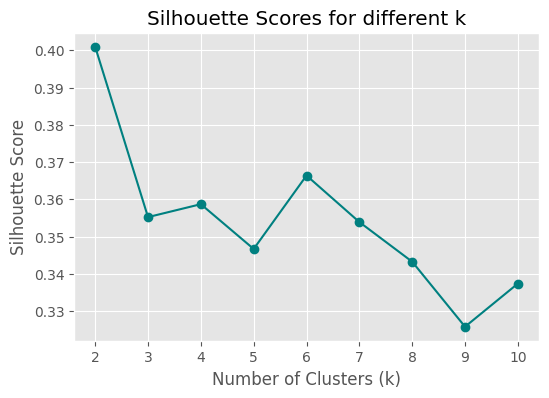

In [23]:
#select features
features_num = df[numeric_cols]

sil_scores = []
k_values = range(2, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_num)
    score = silhouette_score(features_num, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")
    
best_k = k_values[np.argmax(sil_scores)]  # Select k with the highest silhouette score
print(f"Best k based on Silhouette Score: {best_k}")

    
# Optional: Plot Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(k_values, sil_scores, marker='o', color='teal')
plt.title('Silhouette Scores for different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [24]:
# Fit the final model with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster_2'] = kmeans.fit_predict(df[numeric_cols])  # Assign clusters

# View cluster counts
print(df['Cluster_2'].value_counts())

# View cluster characteristics
cluster_profile = df.groupby('Cluster_2').mean()
print(cluster_profile)


1    3733
0    1099
Name: Cluster_2, dtype: int64
                      ID    Gender  Ever_Married       Age  Graduated  \
Cluster_2                                                               
0          463445.503185  0.503185      0.484986 -0.119397   0.616924   
1          463478.716046  0.557193      0.618002  0.226301   0.618002   

           Profession  Work_Experience  Spending_Score  Family_Size   Cluster  
Cluster_2                                                                      
0            2.767971         1.767971        1.483167    -0.132393  0.508644  
1            2.786767        -0.032079        1.331369    -0.053174  0.504688  


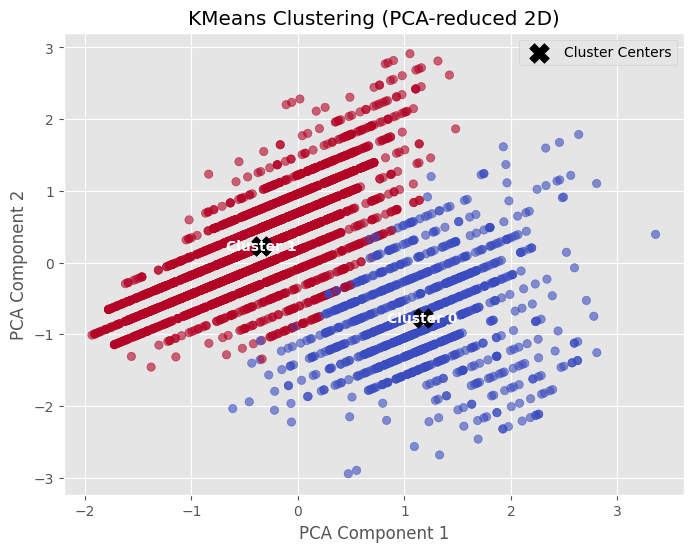

In [25]:
# Reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[numeric_cols])

# Scatter plot of clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster_2'], cmap='coolwarm', alpha=0.6)
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:,0], centers_2d[:,1], s=200, c='black', marker='X', label='Cluster Centers')

# Annotate centers
for i, (x, y) in enumerate(centers_2d):
    plt.text(x, y, f'Cluster {i}', fontsize=10, ha='center', va='center', color='white', weight='bold')

plt.title('KMeans Clustering (PCA-reduced 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

In [26]:
df['Segment'] = df['Cluster_2'].map({0: 'Budget Customers', 1: 'Premium Customers'})

In [27]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster,Cluster_2,Segment
0,462809,1,0,-0.782609,0,5,0.00,2,0.5,1,1,Premium Customers
1,462643,0,1,-0.086957,1,2,0.00,0,0.0,1,1,Premium Customers
2,466315,0,1,1.173913,1,2,0.00,2,-1.0,0,1,Premium Customers
3,461735,1,1,1.173913,1,7,-0.25,1,-0.5,1,1,Premium Customers
4,462669,0,1,0.000000,1,3,0.00,1,1.5,1,1,Premium Customers


#### Analysis and Insights After Clustering

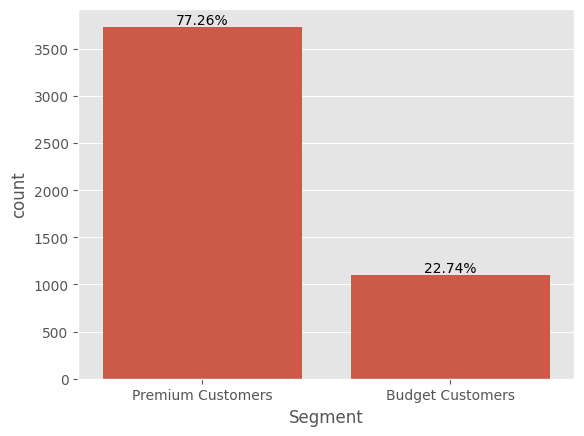

In [28]:
sb.countplot(data=df, x='Segment')

# Get the count of each class
value_counts = df['Segment'].value_counts()

# Calculate the percentage of each class
total = value_counts.sum()
percentages = [(count / total) * 100 for count in value_counts]

# Annotate the bars with the percentage values
for i, count in enumerate(value_counts):
    plt.text(i, count, f'{percentages[i]:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

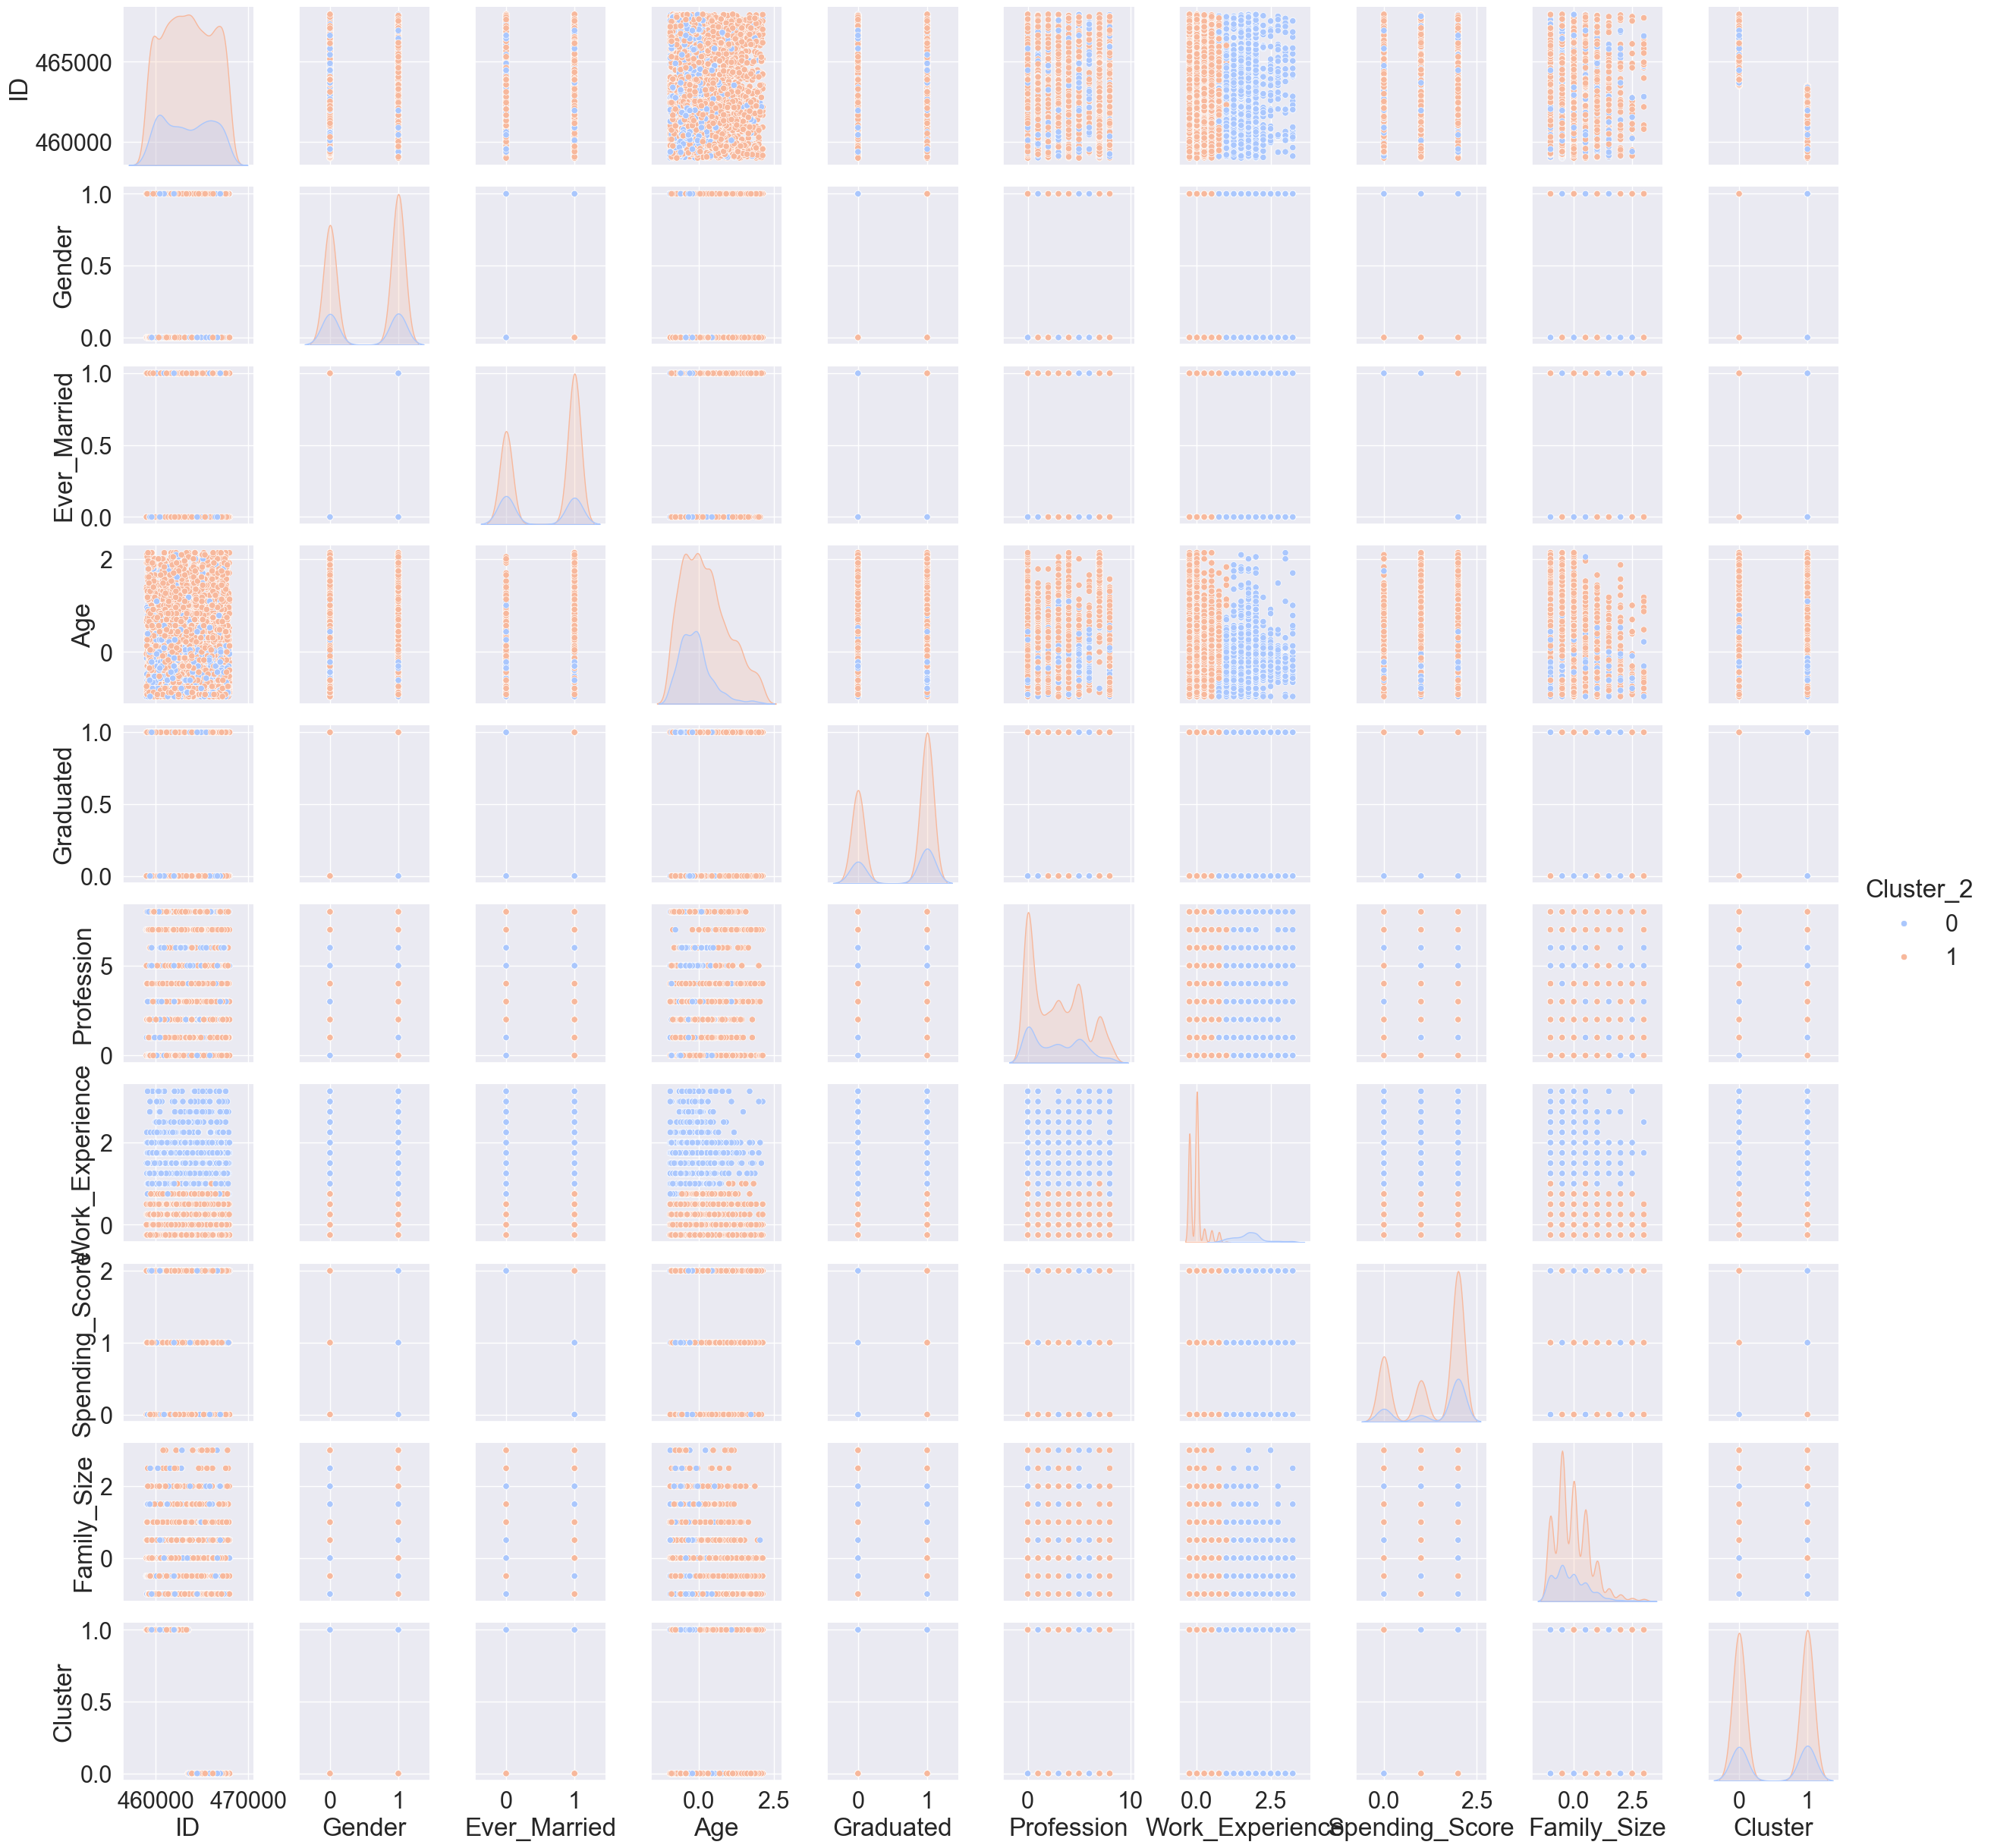

In [31]:
sb.pairplot(df, hue='Cluster_2', palette='coolwarm')
plt.show()

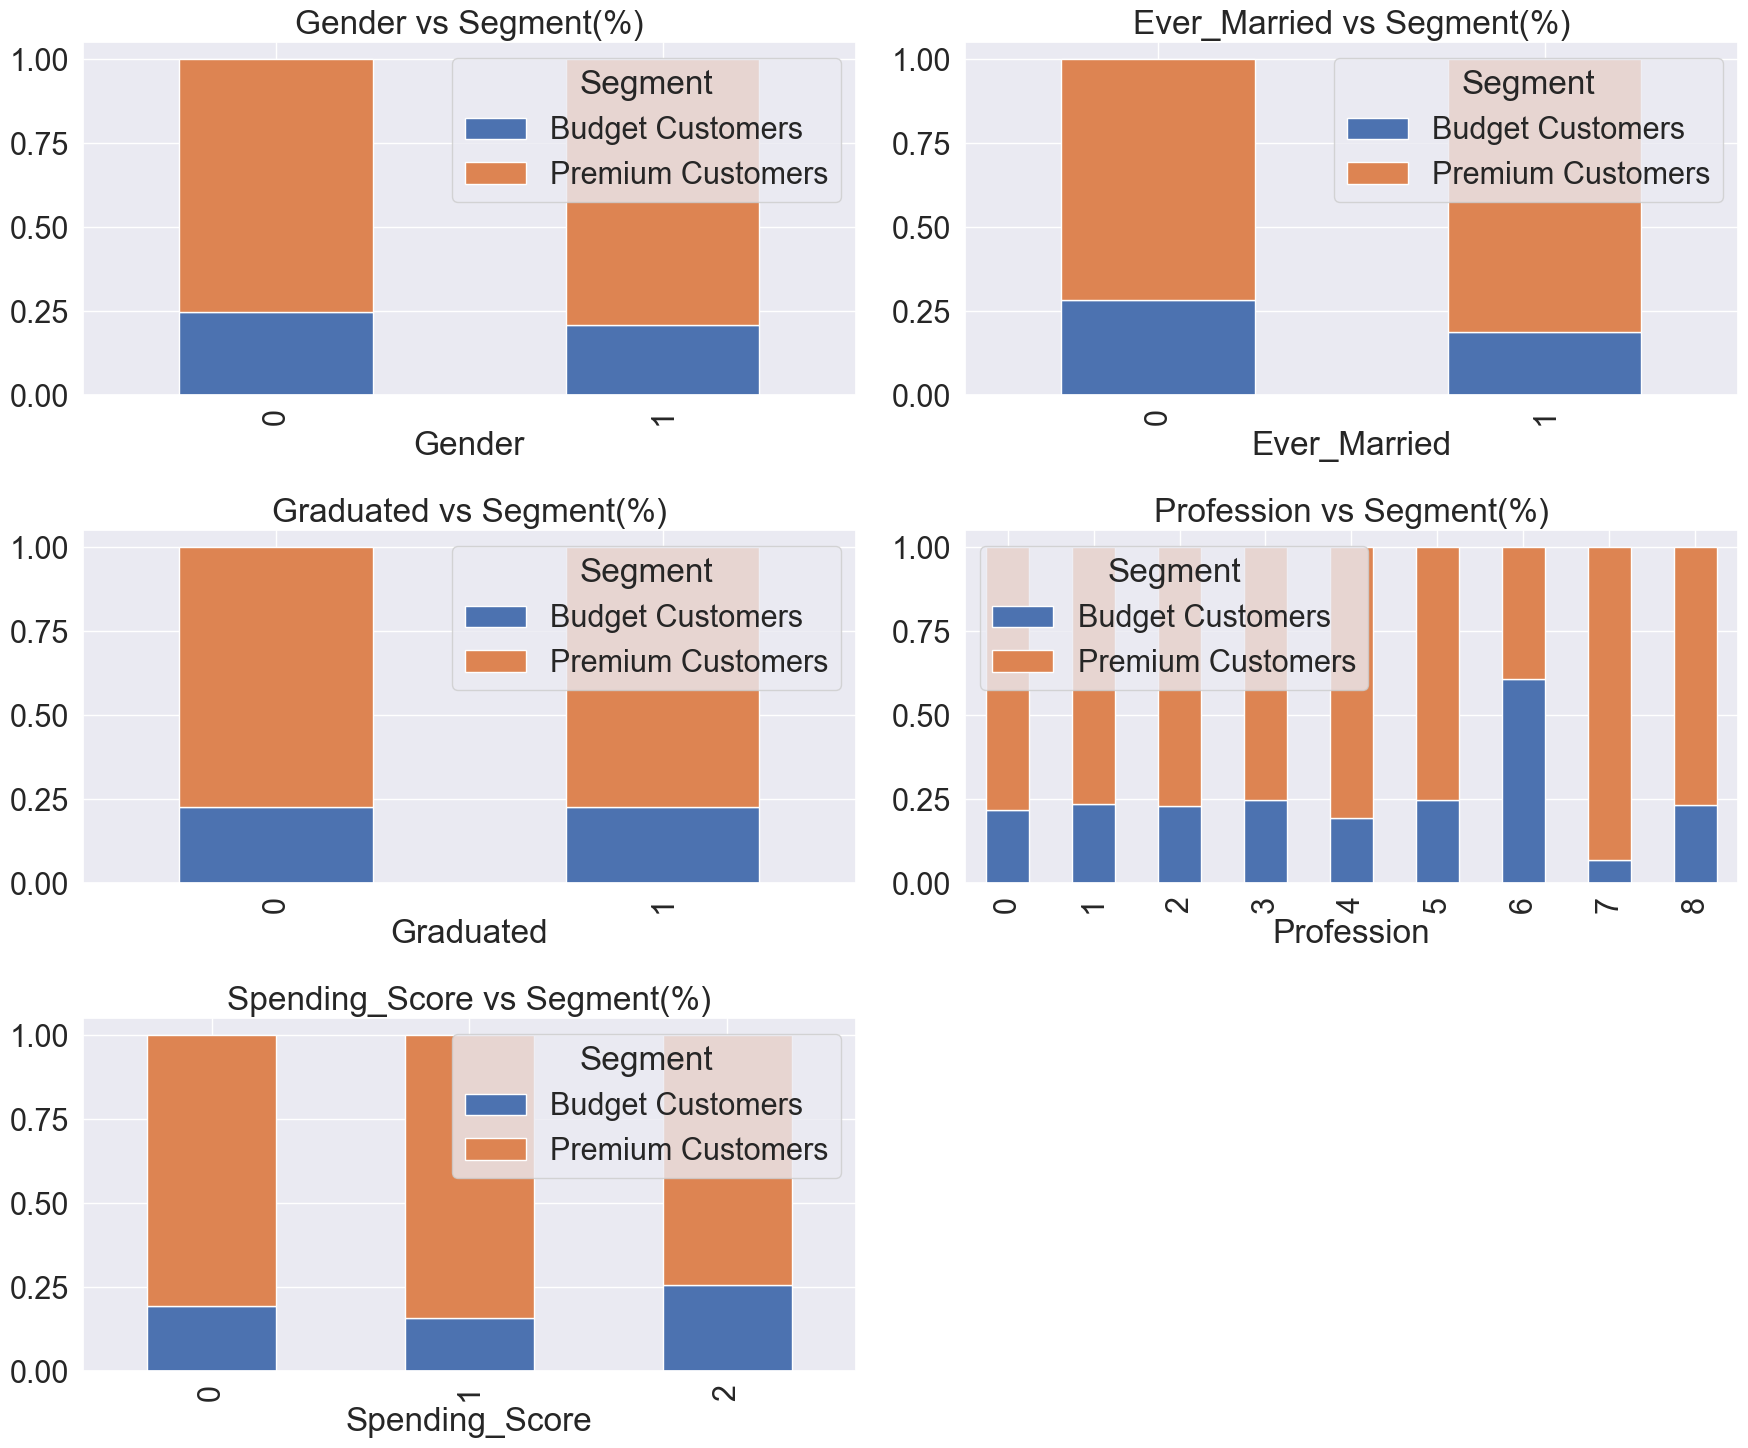

In [32]:
# Variables to visualize
variables = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
sb.set(font_scale=2.0)

# Iterate through variables and plot stacked bar charts
for i, variable in enumerate(variables):
    # Calculate the percentage of "Personal Loan" by category
    stacked_data = (df.groupby([variable, 'Segment'])
                    .size()
                    .unstack()
                    .div(df.groupby(variable).size(), axis=0))
    
    # Plot the stacked bar chart
    stacked_data.plot(kind='bar', stacked=True, ax=axes[i//2, i%2])
    
    # Set the title for the current plot
    axes[i//2, i%2].set_title(f'{variable} vs Segment(%)')

# Remove any extra subplots
for i in range(len(variables), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Adjust the layout
plt.tight_layout()

# Display the subplots
plt.show()


### Analysis And Insights

This clustering analysis using the TapToBuy dataset aimed to segment customers based on demographic and behavioral attributes. After performing data cleaning, scaling, and encoding, KMeans clustering was applied. The optimal number of clusters was determined to be k = 2, using both the Elbow Method and Silhouette Scores.

#### Feature Wise Observation By Segment

Profession: Premium customers are commonly found in professional or high-tier roles such as Artists and Engineers, while Budget customers are more often in general or lower-tier roles.

Education: A large proportion of Premium customers are graduates, suggesting that higher education may influence spending behavior.

Marital Status: Premium customers include a higher percentage of individuals who are married.

Family Size: Premium customers generally have smaller family sizes compared to Budget customers.

Age & Work Experience: Premium customers tend to be older and have more work experience.

Spending Score: Spending scores are not uniformly distributed; Premium customers tend to have higher spending scores.

Gender: Gender distribution is fairly balanced across both segments, with no strong bias observed.



#### conclusion

These insights can help the TapToBuy businesses tailor marketing strategies, personalize offers, and enhance customer experience
by understanding and targeting each segment more effectively.